In [1]:
import pandas as pd

# Applying Classification Model

In [2]:
# Data about checking condition of heart

In [3]:
data2 = pd.read_csv("heart.csv")
data2.shape

(303, 14)

In [4]:
data2['output'].value_counts()

output
1    165
0    138
Name: count, dtype: int64

In [5]:
data2.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [6]:
import pandas as pd
correlation_matrix = data2.corr()
print(correlation_matrix["output"].sort_values(ascending=False))

output      1.000000
cp          0.433798
thalachh    0.421741
slp         0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trtbps     -0.144931
age        -0.225439
sex        -0.280937
thall      -0.344029
caa        -0.391724
oldpeak    -0.430696
exng       -0.436757
Name: output, dtype: float64


In [7]:
# splitting Data into training and testing sets

In [8]:
data2=data2.drop('exng', axis=1)
data2=data2.drop('oldpeak', axis=1)
data2=data2.drop('caa', axis=1)

In [9]:
from sklearn.model_selection import train_test_split
# Split data into features (X) and target (y)
X = data2.drop('output', axis=1)
y = data2['output']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

log_reg = LogisticRegression(max_iter=30,solver='liblinear',random_state=0)
log_reg.fit(X_train,y_train)
log_reg_pred = log_reg.predict(X_test)

acc_log_reg = accuracy_score(y_test, log_reg_pred)
report_log_reg = classification_report(y_test, log_reg_pred)

In [11]:
from sklearn.model_selection import cross_val_score
# F1-score (macro) cross-validation
f1_scores = cross_val_score(log_reg, X_train, y_train, cv=5, scoring='f1_macro')
print(f"F1 Macro Scores: {f1_scores}")
print("F1 Macro: %0.2f mean with a standard deviation of %0.2f" % (f1_scores.mean(), f1_scores.std()))

# Accuracy cross-validation
accuracy_scores = cross_val_score(log_reg, X_train, y_train, cv=5, scoring='accuracy')
print(f"Accuracy Scores: {accuracy_scores}")
print("Accuracy: %0.2f mean with a standard deviation of %0.2f" % (accuracy_scores.mean(), accuracy_scores.std()))

F1 Macro Scores: [0.73065539 0.81353066 0.74603175 0.78835979 0.85410334]
F1 Macro: 0.79 mean with a standard deviation of 0.04
Accuracy Scores: [0.73469388 0.81632653 0.75       0.79166667 0.85416667]
Accuracy: 0.79 mean with a standard deviation of 0.04


In [12]:
print("Logistic Regression Classification Accuracy:", acc_log_reg)
print("Classification Report:\n", report_log_reg)

Logistic Regression Classification Accuracy: 0.8524590163934426
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.90      0.85        29
           1       0.90      0.81      0.85        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.86      0.85      0.85        61



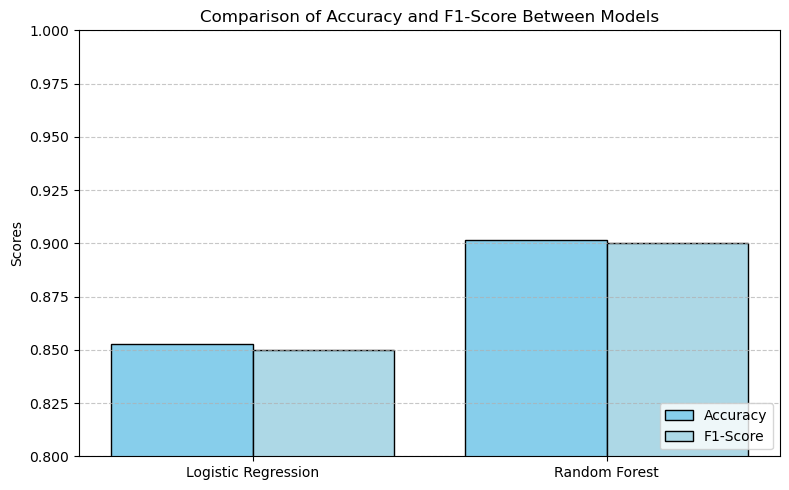

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting
models = ['Logistic Regression', 'Random Forest']
accuracy = [0.8525, 0.9016]  # Accuracies of the models
f1_scores = [0.85, 0.90]  # F1-scores of the models

x = np.arange(len(models))  # X-axis positions

# Plot configuration
fig, ax = plt.subplots(figsize=(8, 5))
width = 0.4  # Width of the bars

# Plotting accuracy and F1-score as bar plots
ax.bar(x - width/2, accuracy, width=width, label='Accuracy', color='skyblue', edgecolor='black')
ax.bar(x + width/2, f1_scores, width=width, label='F1-Score', color='lightblue', edgecolor='black')

# Adding labels, title, and legend
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.set_ylabel('Scores')
ax.set_ylim(0.8, 1.0)  # Limit to focus on the range of values
ax.set_title('Comparison of Accuracy and F1-Score Between Models')
ax.legend(loc='lower right')

# Display grid for better visualization
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()
